# Laboratorio 2 | Deep Learning 

In [11]:
# Renatto Esteban Guzmán Sosa 21646

# Jennifer Michelle Toxcón Ordoñez 21276

In [33]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [6]:
# # Pasar data de csv a pickle

# df = pd.read_csv('movie_statistic_dataset.csv')

# with open("movie_statistic_dataset.pkl", "wb") as file:
#     pickle.dump(df, file)

In [7]:
# Cargar data con archivo pickle

with open("movie_statistic_dataset.pkl", "rb") as file:
    df = pickle.load(file)

df.head(5)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [12]:
df = df.replace('-', np.nan)

# Luego, eliminar las filas con NaN
#df = df.dropna()

df = df.drop(columns=['movie_title', 'director_professions', 'director_birthYear', 'director_deathYear'])

df

,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,N-movie_averageRating,N-movie_numerOfVotes,N-approval_Index,N-Production budget,N-Domestic gross,N-Worldwide gross
0,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,0.615385,-0.794102,0.388017,1.000000,0.556037,0.550043
1,2019-04-23,"Action,Adventure,Drama",181.0,NaN,8.4,1143642.0,8.489533,400000000,858373000,2794731755,0.769231,-0.151567,0.685467,0.739102,1.000000,0.911773
2,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,0.307692,-0.604020,0.223712,0.647788,-0.438306,-0.284666
3,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,0.487179,-0.354150,0.419859,0.586912,0.069479,-0.045515
4,2018-04-25,"Action,Adventure,Sci-Fi",149.0,NaN,8.4,1091968.0,8.460958,300000000,678815482,2048359754,0.769231,-0.189903,0.679517,0.304272,0.581633,0.401208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2004-05-07,Documentary,100.0,Morgan Spurlock,7.2,110078.0,6.017902,65000,11529368,22233808,0.461538,-0.918340,0.170786,-0.999935,-0.973137,-0.984791
4376,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,6.6,7986.0,4.231464,50000,10426506,10426506,0.307692,-0.994079,-0.201214,-1.000000,-0.975707,-0.992868
4377,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,4.9,1593.0,2.526405,50000,2335352,2335352,-0.128205,-0.998822,-0.556267,-1.000000,-0.994559,-0.998403
4378,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,6.2,14595.0,4.242085,50000,391674,424149,0.205128,-0.989176,-0.199002,-1.000000,-0.999088,-0.999710


In [27]:

data = df

scaler = MinMaxScaler(feature_range=(-1, 1))

data['N-movie_averageRating'] = scaler.fit_transform(df[['movie_averageRating']])

data['N-movie_numerOfVotes'] = scaler.fit_transform(df[['movie_numerOfVotes']])

data['N-approval_Index'] = scaler.fit_transform(df[['approval_Index']])

data['N-Production budget'] = scaler.fit_transform(df[['Production budget $']])

data['N-Domestic gross'] = scaler.fit_transform(df[['Domestic gross $']])

data['N-Worldwide gross'] = scaler.fit_transform(df[['Worldwide gross $']])

data['production_year'] = pd.to_datetime(data['production_date']).dt.year

data['N-production_year'] = scaler.fit_transform(data[['production_year']])



data = df.drop(columns=['movie_averageRating','movie_numerOfVotes','approval_Index','Production budget $','Domestic gross $','Worldwide gross $', \
                        'production_date','production_year'])

columns_to_rename = [col for col in data.columns if col.startswith('N-')]

# Crear un diccionario de mapeo para renombrar
rename_dict = {col: col[2:] for col in columns_to_rename}

# Renombrar las columnas
data = data.rename(columns=rename_dict)


data

,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget,Domestic gross,Worldwide gross,production_year
0,"Action,Adventure,Fantasy",192.0,James Cameron,0.615385,-0.794102,0.388017,1.000000,0.556037,0.550043,0.981481
1,"Action,Adventure,Drama",181.0,NaN,0.769231,-0.151567,0.685467,0.739102,1.000000,0.911773,0.925926
2,"Action,Adventure,Fantasy",137.0,Rob Marshall,0.307692,-0.604020,0.223712,0.647788,-0.438306,-0.284666,0.777778
3,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,0.487179,-0.354150,0.419859,0.586912,0.069479,-0.045515,0.851852
4,"Action,Adventure,Sci-Fi",149.0,NaN,0.769231,-0.189903,0.679517,0.304272,0.581633,0.401208,0.907407
...,...,...,...,...,...,...,...,...,...,...
4375,Documentary,100.0,Morgan Spurlock,0.461538,-0.918340,0.170786,-0.999935,-0.973137,-0.984791,0.648148
4376,"Comedy,Drama,Romance",98.0,Edward Burns,0.307692,-0.994079,-0.201214,-1.000000,-0.975707,-0.992868,0.481481
4377,"Drama,Romance",93.0,Vincent Jay Miller,-0.128205,-0.998822,-0.556267,-1.000000,-0.994559,-0.998403,0.592593
4378,"Comedy,Drama,Romance",98.0,Lena Dunham,0.205128,-0.989176,-0.199002,-1.000000,-0.999088,-0.999710,0.759259


In [28]:
# Paso 1: Separar los géneros
data['genres_list'] = data['genres'].str.split(',')

# Paso 2: Usar get_dummies
genres_dummies = data['genres_list'].explode().str.get_dummies().groupby(level=0).max()

# Paso 3: Unir las nuevas columnas dummy al DataFrame original
data = pd.concat([data, genres_dummies], axis=1)

# Paso 4: Eliminar la columna original de géneros y la columna de lista si ya no las necesitas
data = data.drop(['genres', 'genres_list', "\\N"], axis=1)

# Visualizar las primeras filas para verificar
print(data.head())


   runtime_minutes  director_name  movie_averageRating  movie_numerOfVotes  \
0            192.0  James Cameron             0.615385           -0.794102   
1            181.0            NaN             0.769231           -0.151567   
2            137.0   Rob Marshall             0.307692           -0.604020   
3            141.0    Joss Whedon             0.487179           -0.354150   
4            149.0            NaN             0.769231           -0.189903   

   approval_Index  Production budget  Domestic gross  Worldwide gross  \
0        0.388017           1.000000        0.556037         0.550043   
1        0.685467           0.739102        1.000000         0.911773   
2        0.223712           0.647788       -0.438306        -0.284666   
3        0.419859           0.586912        0.069479        -0.045515   
4        0.679517           0.304272        0.581633         0.401208   

   production_year  Action  ...  Music  Musical  Mystery  News  Romance  \
0         0.98148

In [29]:
# Data without info from directors
nd_data = data

nd_data = nd_data.drop(columns=['director_name'])

nd_data

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget,Domestic gross,Worldwide gross,production_year,Action,Adventure,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,192.0,0.615385,-0.794102,0.388017,1.000000,0.556037,0.550043,0.981481,1,1,...,0,0,0,0,0,0,0,0,0,0
1,181.0,0.769231,-0.151567,0.685467,0.739102,1.000000,0.911773,0.925926,1,1,...,0,0,0,0,0,0,0,0,0,0
2,137.0,0.307692,-0.604020,0.223712,0.647788,-0.438306,-0.284666,0.777778,1,1,...,0,0,0,0,0,0,0,0,0,0
3,141.0,0.487179,-0.354150,0.419859,0.586912,0.069479,-0.045515,0.851852,1,1,...,0,0,0,0,0,1,0,0,0,0
4,149.0,0.769231,-0.189903,0.679517,0.304272,0.581633,0.401208,0.907407,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,100.0,0.461538,-0.918340,0.170786,-0.999935,-0.973137,-0.984791,0.648148,0,0,...,0,0,0,0,0,0,0,0,0,0
4376,98.0,0.307692,-0.994079,-0.201214,-1.000000,-0.975707,-0.992868,0.481481,0,0,...,0,0,0,0,1,0,0,0,0,0
4377,93.0,-0.128205,-0.998822,-0.556267,-1.000000,-0.994559,-0.998403,0.592593,0,0,...,0,0,0,0,1,0,0,0,0,0
4378,98.0,0.205128,-0.989176,-0.199002,-1.000000,-0.999088,-0.999710,0.759259,0,0,...,0,0,0,0,1,0,0,0,0,0


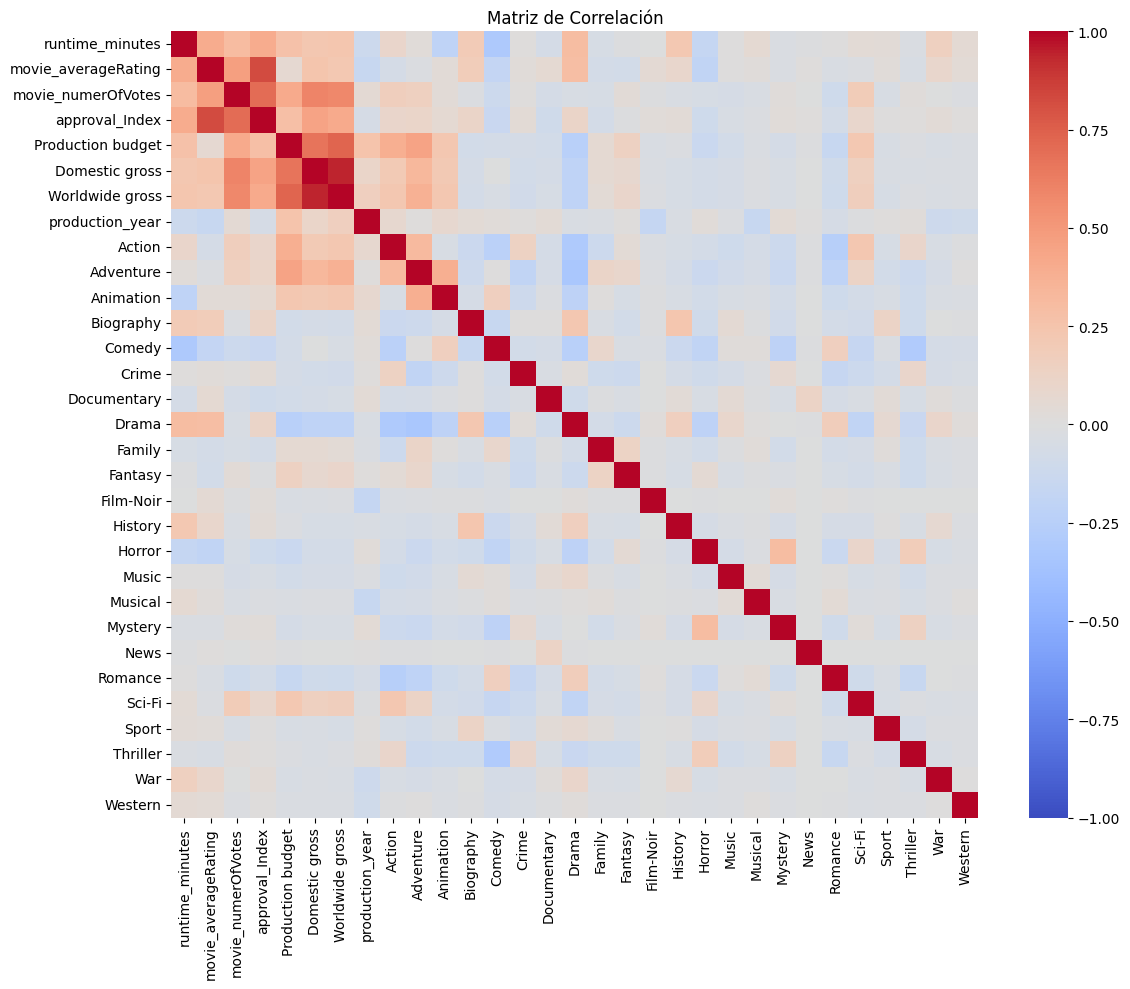

In [34]:
correlation = nd_data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap
sns.heatmap(correlation, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Configurar el título
plt.title('Matriz de Correlación')

# Ajustar la disposición
plt.tight_layout()

# Mostrar el plot
plt.show()


In [36]:
print(nd_data.value_counts())    



runtime_minutes  movie_averageRating  movie_numerOfVotes  approval_Index  Production budget  Domestic gross  Worldwide gross  production_year  Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  Film-Noir  History  Horror  Music  Musical  Mystery  News  Romance  Sci-Fi  Sport  Thriller  War  Western
63.0              0.435897            -0.980651           -0.003619       -0.869768          -0.937807       -0.965698        0.777778         0       1          1          0          1       0      0            0      0       0        0          0        0       0      0        0        0     0        0       0      0         0    0          1
115.0            -0.076923            -0.996383           -0.446198       -0.826285          -0.983691       -0.995212        0.203704         1       1          0          0          0       0      0            1      0       0        0          0        0       0      0        0        0     0        0      

In [37]:
# X = df[['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 
#         'Production budget $'] + 
#        [col for col in df.columns if col.startswith('genres_')]]

X = nd_data[["runtime_minutes", "movie_averageRating", "movie_numerOfVotes", "approval_Index", "Production budget", \
        "production_year", "Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", \
        "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "News", "Romance", "Sci-Fi", "Sport", "Thriller", "War", "Western"]]

y = nd_data[["Domestic gross", "Worldwide gross"]]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20,
  random_state=42
)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
len(X.columns)

29

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2


In [64]:
model = Sequential([
    Dense(64, input_shape=(29,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='mse', metrics=['accuracy'], 
    run_eagerly=True
)


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model_history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_split=0.2, verbose=2)


Epoch 1/200
71/71 - 3s - 48ms/step - accuracy: 0.6532 - loss: 1.9975 - val_accuracy: 0.9044 - val_loss: 1.9963
Epoch 2/200
71/71 - 3s - 42ms/step - accuracy: 0.8484 - loss: 1.9877 - val_accuracy: 0.2083 - val_loss: 1.9970
Epoch 3/200
71/71 - 3s - 40ms/step - accuracy: 0.7913 - loss: 1.9880 - val_accuracy: 0.8374 - val_loss: 1.9964
Epoch 4/200
71/71 - 3s - 47ms/step - accuracy: 0.7902 - loss: 1.9878 - val_accuracy: 0.9058 - val_loss: 1.9963
Epoch 5/200
71/71 - 5s - 71ms/step - accuracy: 0.7449 - loss: 1.9879 - val_accuracy: 0.9058 - val_loss: 1.9963
Epoch 6/200
71/71 - 3s - 43ms/step - accuracy: 0.7941 - loss: 1.9877 - val_accuracy: 0.9058 - val_loss: 1.9963
Epoch 7/200
71/71 - 3s - 49ms/step - accuracy: 0.7488 - loss: 1.9879 - val_accuracy: 0.9058 - val_loss: 1.9965
Epoch 8/200
71/71 - 5s - 67ms/step - accuracy: 0.7995 - loss: 1.9878 - val_accuracy: 0.6362 - val_loss: 1.9965
Epoch 9/200
71/71 - 4s - 49ms/step - accuracy: 0.7788 - loss: 1.9878 - val_accuracy: 0.9030 - val_loss: 1.9962
E

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

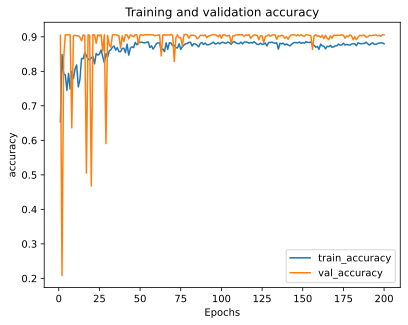

In [66]:

plot_metric(model_history, 'accuracy')

In [93]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/100
66/66 - 5s - 80ms/step - loss: 0.7203 - mean_absolute_error: 0.5144 - val_loss: 985.1141 - val_mean_absolute_error: 1.9128
Epoch 2/100
66/66 - 6s - 83ms/step - loss: 0.5714 - mean_absolute_error: 0.4455 - val_loss: 4967.8613 - val_mean_absolute_error: 3.4040
Epoch 3/100
66/66 - 11s - 160ms/step - loss: 0.5169 - mean_absolute_error: 0.4043 - val_loss: 31231.2344 - val_mean_absolute_error: 5.8861
Epoch 4/100
66/66 - 5s - 78ms/step - loss: 0.4985 - mean_absolute_error: 0.3945 - val_loss: 121154.7031 - val_mean_absolute_error: 13.1503
Epoch 5/100
66/66 - 5s - 80ms/step - loss: 0.4600 - mean_absolute_error: 0.3844 - val_loss: 313683.2500 - val_mean_absolute_error: 22.2400
Epoch 6/100
66/66 - 5s - 81ms/step - loss: 0.4756 - mean_absolute_error: 0.3941 - val_loss: 703696.1250 - val_mean_absolute_error: 33.7054
Epoch 7/100
66/66 - 5s - 83ms/step - loss: 0.4922 - mean_absolute_error: 0.3914 - val_loss: 1398257.5000 - val_mean_absolute_error: 46.1042
Epoch 8/100
66/66 - 5s - 78ms/ste

KeyboardInterrupt: 